<a href="https://colab.research.google.com/github/jellyplum/pandas/blob/main/CNN_mnist_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install ipycanvas
!pip install ipywidgets

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipycanvas import Canvas
from IPython.display import display

# 下載MNIST資料集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 正規化到 [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# 增加 channel 維度
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [50]:
# 建立CNN模型
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # 注意：最後這層沒有Softmax！
])

# 編譯模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n測試資料集上的準確率：{test_acc:.4f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.8969 - loss: 0.3318 - val_accuracy: 0.9870 - val_loss: 0.0412
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 26ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9880 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9928 - loss: 0.0232 - val_accuracy: 0.9899 - val_loss: 0.0354
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy: 0.9896 - val_loss: 0.0343
313/313 - 2s - 7ms/step - accuracy: 0.9896 - loss: 0.0343

測試資料集上的準確率：0.9896


In [62]:
# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


from ipycanvas import Canvas, hold_canvas
from IPython.display import display
import time


canvas = Canvas(width=280, height=280, sync_image_data=True)

# 填滿黑色背景
canvas.fill_style = 'black'
canvas.fill_rect(0, 0, canvas.width, canvas.height)

# 設定畫筆顏色為白色
canvas.stroke_style = 'white'
canvas.line_width = 15

display(canvas)

# 清除畫布功能
def clear_canvas():
    canvas.clear()

# 輔助畫圓形
def draw_circle(x, y, r):
    canvas.begin_path()
    canvas.arc(x, y, r, 0, 2 * 3.1415)
    canvas.stroke()

# 輔助畫直線
def draw_line(x1, y1, x2, y2):
    canvas.begin_path()
    canvas.move_to(x1, y1)
    canvas.line_to(x2, y2)
    canvas.stroke()


def draw_text(text, x=10, y=30):
    canvas.fill_style = 'white'  # 白色字
    canvas.font = '24px sans-serif'
    canvas.fill_text(text, x, y)
    canvas.fill_style = 'white'  # 保持白色，避免後面畫到別的顏色


# --- 新增：滑鼠移動時畫線 ---

# 用來記錄是否按下滑鼠
is_drawing = False

# 當滑鼠按下時，開始畫
def on_mouse_down(x, y):
    global is_drawing
    is_drawing = True
    canvas.begin_path()
    canvas.move_to(x, y)

# 當滑鼠移動時，畫線
def on_mouse_move(x, y):
    if is_drawing:
        canvas.line_to(x, y)
        canvas.stroke()

# 當滑鼠放開時，停止畫線
def on_mouse_up(x, y):
    global is_drawing
    is_drawing = False

# 綁定滑鼠事件
canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)


--2025-04-27 15:10:02--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.188.102, 64.233.188.100, 64.233.188.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-27 15:10:02--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  27.2MB/s    in 0.7s    

2025-04-27 15:10:

Canvas(height=280, sync_image_data=True, width=280)

Button(description='預測數字', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
模型預測數字：4
預測信心分數：82.14%


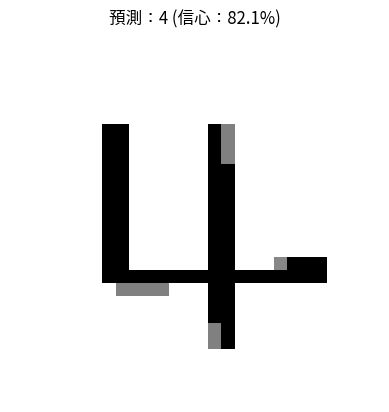

In [63]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 預測按鈕
predict_button = widgets.Button(description="預測數字")

def predict_digit(b):
    # 1. 取得畫布內容（回傳的是RGBA圖片）
    img_data = np.array(canvas.get_image_data())

    # 2. 轉成灰階（取RGB均值）
    img_gray = np.mean(img_data[:, :, :3], axis=2)

    # 3. 顏色反轉（MNIST是黑底白字）
    img_gray = 255 - img_gray

    # 4. 縮小成28x28（MNIST標準尺寸）
    img_small = tf.image.resize(img_gray[..., np.newaxis], (28,28)).numpy()

    # 5. 正規化到[0,1]
    img_small = img_small / 255.0

    # 6. 增加batch維度 (1, 28, 28, 1)
    img_input = np.expand_dims(img_small, axis=0)

    # 7. 丟進模型預測
    prediction = probability_model.predict(img_input)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)

    # 8. 顯示結果
    print(f"模型預測數字：{predicted_label}")
    print(f"預測信心分數：{confidence*100:.2f}%")

    # 顯示縮小後的圖片（讓你看模型眼中看到的是什麼）
    plt.imshow(img_small.reshape(28,28), cmap='gray')
    plt.title(f"預測：{predicted_label} (信心：{confidence*100:.1f}%)")
    plt.axis('off')
    plt.show()

# 綁定預測按鈕
predict_button.on_click(predict_digit)
display(predict_button)
